# Preadicting heart-disease using machine learning

We are going to take the following approch:

1. Problem Defination
2. Data
3. Evaluation
4. Feature
5. Modelling
6. Experimentation

## 1. Problem Defination and 2. Data



* by searching in UCI ML models and in Kaggle

## 3. Evaluation 

* Atleast getting 95% of accuracy

## 4. Features 

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
* thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)
* Note: No personal identifiable information (PPI) can be found in the dataset.

## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models for skLearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score


## Lode Data

In [2]:
df=pd.read_csv('c:/Users/aryan/Documents/aiml/data/heart-disease.csv') # using !cd
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### comparing sex and target

In [5]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


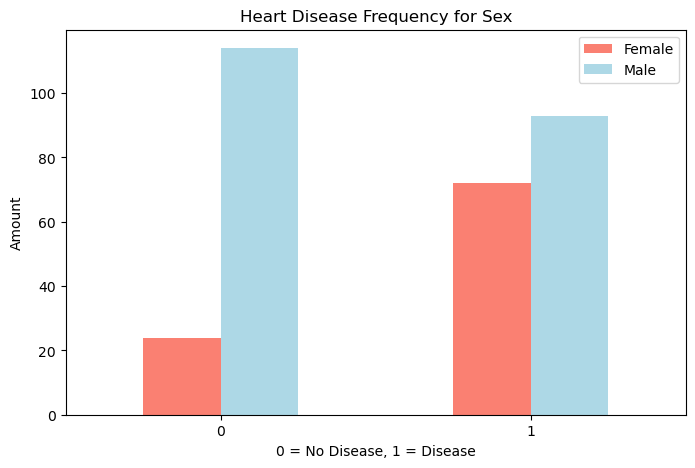

In [6]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(8,5),color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs Max Heart Disease

In [7]:
pd.crosstab(df.thalach,df.target)

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


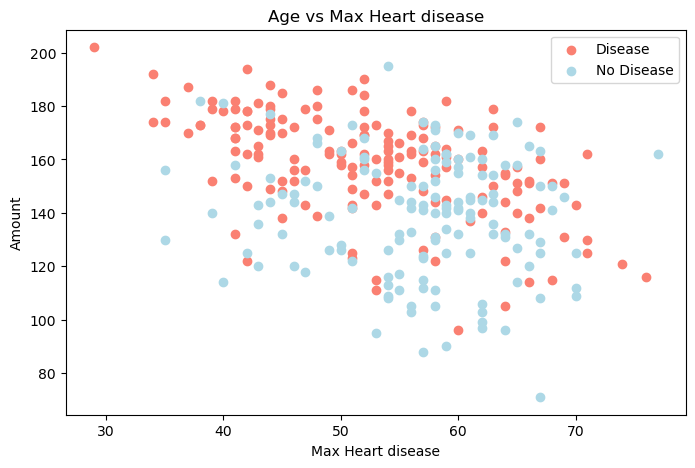

In [8]:
plt.figure(figsize=(8,5))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color=["salmon"])

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color=["lightblue"]);

plt.title("Age vs Max Heart disease")
plt.xlabel("Max Heart disease")
plt.ylabel("Amount")
plt.legend(["Disease","No Disease"]);


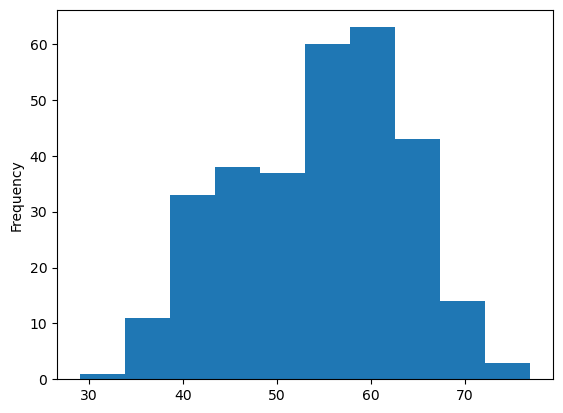

In [9]:
df.age.plot.hist();

In [10]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


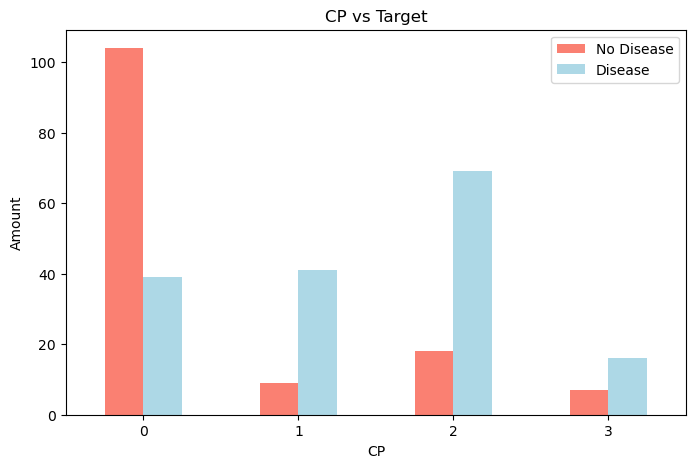

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(8,5),color=["salmon","lightblue"])

plt.title("CP vs Target")
plt.xlabel("CP")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [12]:

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


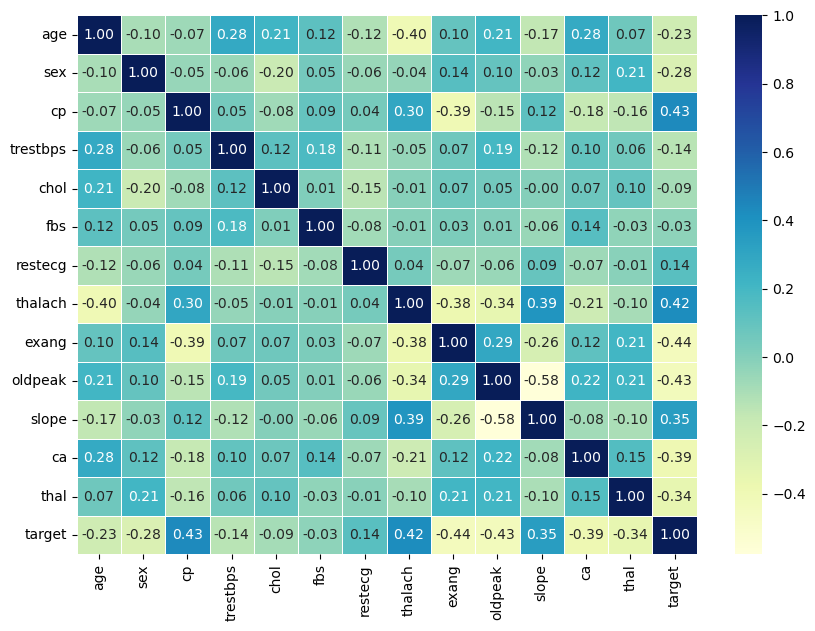

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

## Modelling


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X=df.drop("target",axis=1)
y=df["target"]

In [16]:

np.random.seed(34)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [37]:
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "RandomForest":RandomForestClassifier()}

def model_and_score(model,X_train,y_train,X_test,y_test):
    np.random.seed(34)

    model_scores={}

    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [18]:
model_scores=model_and_score(model=models,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
model_scores

c:\Users\aryan\Documents\aiml\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7213114754098361,
 'RandomForest': 0.8852459016393442}

model comparision

In [19]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,RandomForest
accuracy,0.852459,0.721311,0.885246


In [20]:
model_compare.T

,accuracy
Logistic Regression,0.852459
KNN,0.721311
RandomForest,0.885246


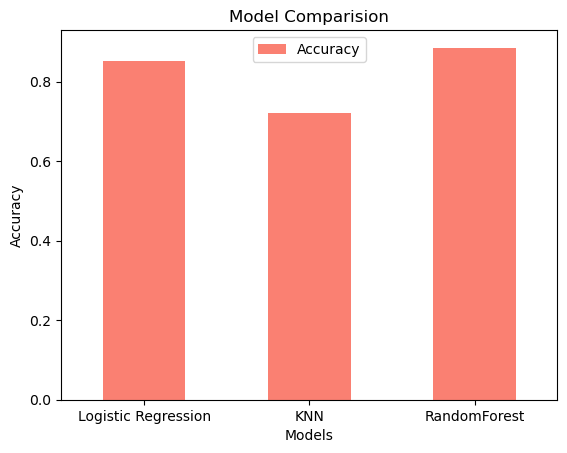

In [39]:
model_compare.T.plot.bar(color=["salmon"])
plt.xticks(rotation=0)
plt.title("Model Comparision")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

## Hyperparaeter Tuning(By hand)

KNN

In [22]:
train_score=[]
test_score=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))


In [23]:
train_score

[1.0,
 0.7933884297520661,
 0.7520661157024794,
 0.768595041322314,
 0.743801652892562,
 0.7396694214876033,
 0.71900826446281,
 0.731404958677686,
 0.7066115702479339,
 0.7107438016528925,
 0.6652892561983471,
 0.6735537190082644,
 0.6900826446280992,
 0.6570247933884298,
 0.6652892561983471,
 0.6487603305785123,
 0.6611570247933884,
 0.6487603305785123,
 0.6446280991735537,
 0.6611570247933884]

In [24]:
test_score

[0.6557377049180327,
 0.6065573770491803,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7049180327868853]

Max KNN score on test data: 77.05%


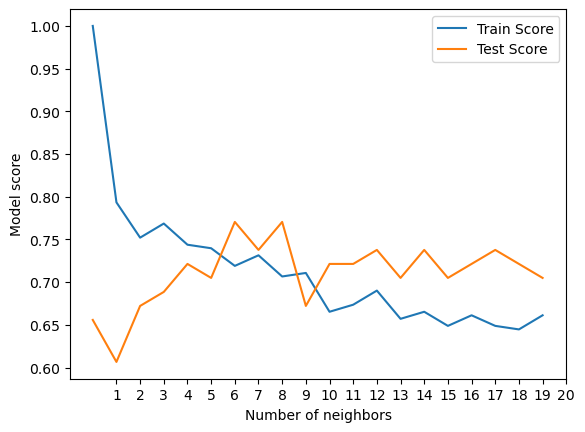

In [25]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend(["Train Score","Test Score"])

print(f"Max KNN score on test data: {max(test_score)*100:.2f}%")

## Hyperparameter Tuning (By RandomizedSearch CV )

In [26]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [27]:
np.random.seed(32)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=10,verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [29]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7213114754098361,
 'RandomForest': 0.8852459016393442}

In [30]:
np.random.seed(32)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=10,verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.score(X_test,y_test)

0.8852459016393442

## Hyperparameter Tuning (with GridSearchCV)

In [32]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

In [33]:
# rf_grid={"n_estimators": np.arange(10,1000,50),
#          "max_depth":[None,3,5,10],
#          "min_samples_split":np.arange(2,20,2),
#          "min_samples_leaf":np.arange(1,20,2)}

# gs_rf= GridSearchCV(RandomForestClassifier(),param_grid=rf_grid,cv=5,verbose=True)

# gs_rf.fit(X_train,y_train)
# gs_rf.score(X_test,y_test)


# takes 766 mins  /0_0\

## Evaluating our tuned machine learning classifer, beyond accuracy


In [34]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [35]:
y_test

56     1
297    0
262    0
170    0
74     1
      ..
294    0
128    1
228    0
28     1
40     1
Name: target, Length: 61, dtype: int64